In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
numerical_df = pd.read_csv('numerical_cleaned.csv')
display(numerical_df.shape)
numerical_df.head()

(9134, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


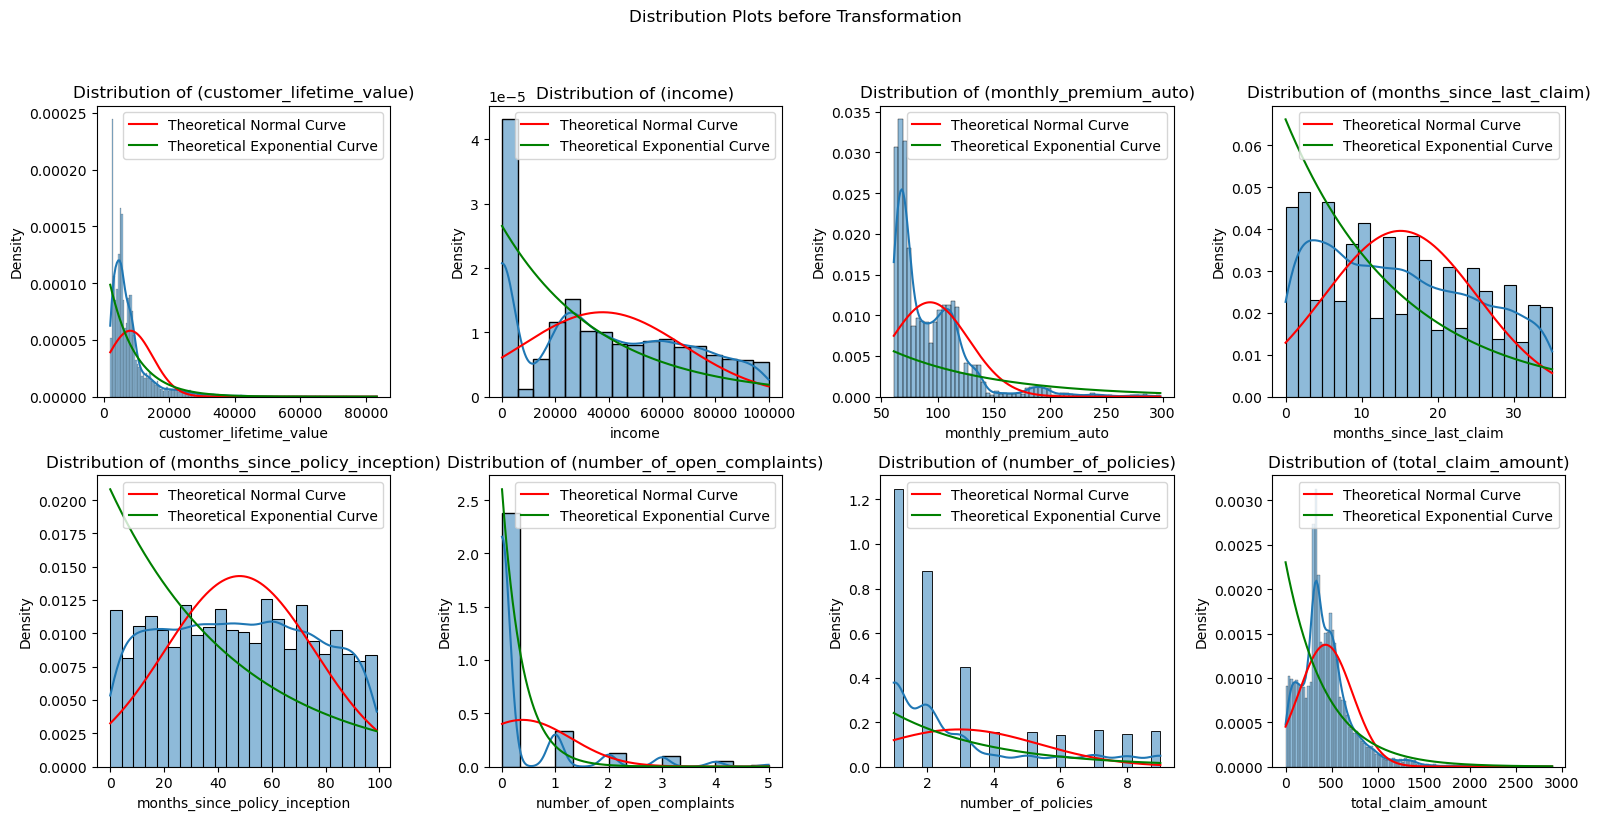

In [16]:
from scipy.stats import norm, expon
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution Plots before Transformation', y=1.02)


# Create distribution plots for each column
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(numerical_df[col], kde=True, ax=ax, stat='density')  # Use stat='density' for probability density estimation
    
# Add theoretical normal curve
    x = np.linspace(numerical_df[col].min(), numerical_df[col].max(), 1000)
    normal_curve = norm.pdf(x, loc=numerical_df[col].mean(), scale=numerical_df[col].std())
    ax.plot(x, normal_curve, color='red', label='Theoretical Normal Curve')
# Add theoretical exponential curve
    exponential_curve = expon.pdf(x, scale=numerical_df[col].mean())  # Exponential distribution with mean as scale parameter
    ax.plot(x, exponential_curve, color='green', label='Theoretical Exponential Curve')
    
    ax.set_title(f'Distribution of ({col})')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

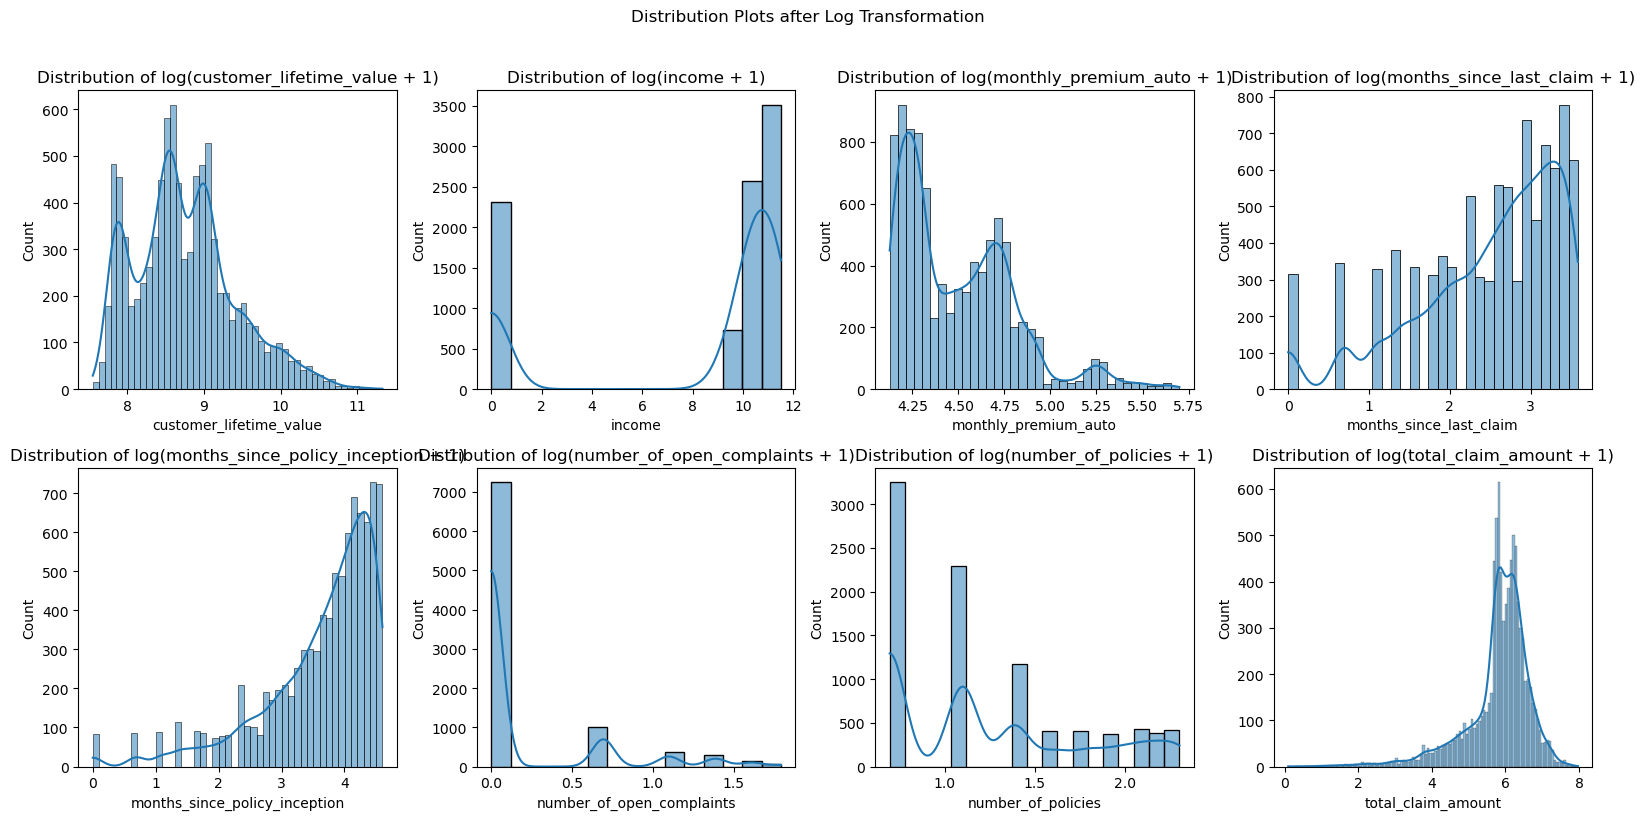

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to visualize
columns_to_plot = ["customer_lifetime_value", "income", "monthly_premium_auto", 
                   "months_since_last_claim", "months_since_policy_inception", 
                   "number_of_open_complaints", "number_of_policies", 
                   "total_claim_amount"]

# Apply log transformation to the data
numerical_df_log_transformed = np.log1p(numerical_df[columns_to_plot])

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution Plots after Log Transformation', y=1.02)

# Create distribution plots for each transformed column
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(numerical_df_log_transformed[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of log({col} + 1)')

# Adjust layout
plt.tight_layout()
plt.show()

# Conclusions

In [17]:
#when we plot the different distributions, before log-transformation, we can see that the following features could have exponential distributions: 
    #Customer lifetime value
    #Monthly premium auto
    #nomber of open complaints
    #income
    #this means that the majority of the customers have a low customer lifetime value, the majority of the customers have purchased policies with very low monthly premiums and the majority of the customers make a small amount of complaints.
    #Finally, the income is obviously exponential: this means that the majority of the customers have very low income and the people that have very high income are the fewest

In [18]:
#the month since last claim and month since policy inception are uniformly distributed which means that there are customers evenly distributed 

In [19]:
#the number of open policies doesn't seem to have any clear fit 

In [20]:
#the total claim amount is having a normal distribution, which means that the majority of customers that make claims make them for really high amounts, this could mean that for damages that are not significant the customers maby prefer to pay themselves instead of using their policy. 

In [21]:
#Since the x axis is not having very large scale I would not use the log transform for anything in this case